
### Problem Statement :

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Step 1 : Importing the data

In [1]:
# Importing all the necessary libraries

# removing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import imblearn
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
# reading the training data 
tele_churn_train=pd.read_csv('train.csv')

In [3]:
# reading the test data
tele_churn_test=pd.read_csv('test.csv')

In [4]:
# adding a churn probablity column in the test set with value 2 so that it can be easily identified as invalid values
tele_churn_test['churn_probability']=2

In [5]:
# checking test set after adding new column
tele_churn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,2
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00,2
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84,2
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00,2
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.78,14.56,2.39,2.66,10.94,0.00,0.00,0.00,0.0,0.00,0.00,2.84,3.44,25.51,450.48,608.24,686.11,58.54,21.18,63.18,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00,2


In [6]:
# concatinating both data set 
pieces=[tele_churn_train,tele_churn_test]
tele_churn = pd.concat(pieces)

In [7]:
# Checking tele_churn data set
tele_churn.shape

(99999, 172)

### Step 2 : Inspecting the data and pre cleaning 

In [8]:
# getting top 5 rows of the data frame
tele_churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.8,308.89,213.47,0.0,0.00,0.0,0.0,35.00,0.0,0.0,35.12,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [9]:
# checking the shape of the data frame
tele_churn.shape

(99999, 172)

In [10]:
# lets divide the data set into 4 equal parts for effective inspection and pre cleaning
p1=tele_churn.iloc[:,0:43]
p2=tele_churn.iloc[:,43:86]
p3=tele_churn.iloc[:,86:129]
p4=tele_churn.iloc[:,129:173]

In [11]:
# lets check the data types and missing values of the columns  
p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 29999
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    99999 non-null  int64  
 1   circle_id             99999 non-null  int64  
 2   loc_og_t2o_mou        98981 non-null  float64
 3   std_og_t2o_mou        98981 non-null  float64
 4   loc_ic_t2o_mou        98981 non-null  float64
 5   last_date_of_month_6  99999 non-null  object 
 6   last_date_of_month_7  99398 non-null  object 
 7   last_date_of_month_8  98899 non-null  object 
 8   arpu_6                99999 non-null  float64
 9   arpu_7                99999 non-null  float64
 10  arpu_8                99999 non-null  float64
 11  onnet_mou_6           96062 non-null  float64
 12  onnet_mou_7           96140 non-null  float64
 13  onnet_mou_8           94621 non-null  float64
 14  offnet_mou_6          96062 non-null  float64
 15  offnet_mou_7       

#### As there are no column with missing values greater than 40%, we won't drop any column.

In [12]:
# lets check the numerical column of p1 and remove columns with same value all over the column
p1.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7
count,99999.000000,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000
mean,49999.000000,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,132.395875,133.670805,133.018098,197.935577,197.045133,196.574803,9.950013,7.149898,7.292981,13.911337,9.818732,9.971890,47.100763,46.473010,45.887806,93.342088,91.397131,91.755128,3.751013,3.792985,3.677991,1.123056,1.368500,1.433821,144.201175,141.670476,141.328209,79.829870,83.299598,83.282673,87.299624,90.804137
std,28867.369122,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,297.207406,308.794148,308.951589,316.851613,325.862803,327.170662,72.825411,73.447948,68.402466,71.443196,58.455762,64.713221,150.856393,155.318705,151.184830,162.780544,157.492308,156.537048,14.230438,14.264986,13.270996,5.448946,7.533445,6.783335,251.751489,248.731086,245.914311,252.476533,263.631042,265.486090,255.617850,269.347911
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.500000,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,7.380000,6.660000,6.460000,34.730000,32.190000,31.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.660000,1.630000,1.600000,9.880000,10.025000,9.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.110000,17.480000,17.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.000000,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,34.310000,32.330000,32.360000,96.310000,91.735000,92.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.910000,11.610000,11.730000,41.030000,40.430000,40.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.110000,63.685000,63.730000,0.000000,0.000000,0.000000,3.950000,3.635000
75%,74998.500000,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,118.740000,115.595000,115.860000,231.860000,226.815000,228.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.960000,39.910000,40.110000,110.390000,107.560000,109.090000,2.080000,2.090000,2.040000,0.000000,0.000000,0.000000,168.270000,164.382500,166.110000,30.807500,31.132500,30.580000,53.290000,54.040000
90%,89998.200000,109.0,0.0,0.0,0.0,620.075400,617.252000,618.160400,344.102000,348.035000,345.030000,477.325000,480.431000,486.310000,11.810000,5.060000,5.340000,22.480000,9.930000,9.130000,104.685000,101.890000,102.630000,234.978000,228.942000,231.430000,9.509000,9.600000,9.350000,2.480000,3.110000,3.430000,356.908000,348.492000,349.910000,215.639000,226.433000,225.510000,234.540000,244.680000
95%,94998.100000,109.0,0.0,0.0,0.0,829.488200,828.357200,833.303300,612.407500,624.835500,620.690000,727.879000,744.225000,734.860000,40.640000,23.140000,24.460000,69.110000,42.990000,42.110000,177.879000,175.991000,177.230000,354.957500,349.390000,351.460000,18.

#### There are many columns which have outliers so we will deal with it in the later steps.

In [13]:
# dropping the column which has more than 100% of same value in the column (this wont help us in our inference or model building)
p1.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],1,inplace=True)

In [14]:
# lets check out the object dtype columns
p1.select_dtypes(include=['object']).describe()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8
count,99999,99398,98899
unique,1,1,1
top,6/30/2014,7/31/2014,8/31/2014
freq,99999,99398,98899


In [15]:
# As all the values of the columns are same we will drop all the columns
p1.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],1,inplace=True)

In [16]:
# lets check the shape of p1
p1.shape

(99999, 36)

In [17]:
# lets explore data frame p2
p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 29999
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   std_og_t2m_mou_8  94621 non-null  float64
 1   std_og_t2f_mou_6  96062 non-null  float64
 2   std_og_t2f_mou_7  96140 non-null  float64
 3   std_og_t2f_mou_8  94621 non-null  float64
 4   std_og_t2c_mou_6  96062 non-null  float64
 5   std_og_t2c_mou_7  96140 non-null  float64
 6   std_og_t2c_mou_8  94621 non-null  float64
 7   std_og_mou_6      96062 non-null  float64
 8   std_og_mou_7      96140 non-null  float64
 9   std_og_mou_8      94621 non-null  float64
 10  isd_og_mou_6      96062 non-null  float64
 11  isd_og_mou_7      96140 non-null  float64
 12  isd_og_mou_8      94621 non-null  float64
 13  spl_og_mou_6      96062 non-null  float64
 14  spl_og_mou_7      96140 non-null  float64
 15  spl_og_mou_8      94621 non-null  float64
 16  og_others_6       96062 non-null  float6

In [18]:
# getting missing %
round(100*p2.isna().sum()/p2.shape[0],2)

std_og_t2m_mou_8    5.38
std_og_t2f_mou_6    3.94
std_og_t2f_mou_7    3.86
std_og_t2f_mou_8    5.38
std_og_t2c_mou_6    3.94
std_og_t2c_mou_7    3.86
std_og_t2c_mou_8    5.38
std_og_mou_6        3.94
std_og_mou_7        3.86
std_og_mou_8        5.38
isd_og_mou_6        3.94
isd_og_mou_7        3.86
isd_og_mou_8        5.38
spl_og_mou_6        3.94
spl_og_mou_7        3.86
spl_og_mou_8        5.38
og_others_6         3.94
og_others_7         3.86
og_others_8         5.38
total_og_mou_6      0.00
total_og_mou_7      0.00
total_og_mou_8      0.00
loc_ic_t2t_mou_6    3.94
loc_ic_t2t_mou_7    3.86
loc_ic_t2t_mou_8    5.38
loc_ic_t2m_mou_6    3.94
loc_ic_t2m_mou_7    3.86
loc_ic_t2m_mou_8    5.38
loc_ic_t2f_mou_6    3.94
loc_ic_t2f_mou_7    3.86
loc_ic_t2f_mou_8    5.38
loc_ic_mou_6        3.94
loc_ic_mou_7        3.86
loc_ic_mou_8        5.38
std_ic_t2t_mou_6    3.94
std_ic_t2t_mou_7    3.86
std_ic_t2t_mou_8    5.38
std_ic_t2m_mou_6    3.94
std_ic_t2m_mou_7    3.86
std_ic_t2m_mou_8    5.38


#### As there are no column with missing values greater than 40%, we won't drop any column.

In [19]:
# lets check the numerical column of p2 and remove columns with more than 90% of same value all over the column
p2.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8
count,94621.000000,96062.000000,96140.000000,94621.000000,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000
mean,89.838390,1.129011,1.115010,1.067792,0.0,0.0,0.0,168.261218,175.221436,174.191498,0.798277,0.776572,0.791247,3.916811,4.978279,5.053769,0.454157,0.030235,0.033372,305.133424,310.231175,304.119513,47.922365,47.990520,47.211362,107.475650,107.120493,108.460515,12.084305,12.599697,11.751834,167.491059,167.719540,167.432575,9.575993,10.011904,9.883921,20.722240,21.656415,21.183211,2.156397,2.216923,2.085004
std,271.757783,7.984970,8.599406,7.905971,0.0,0.0,0.0,389.948499,408.922934,411.633049,25.765248,25.603052,25.544471,14.936449,20.661570,17.855111,4.125911,2.161717,2.323464,463.419481,480.031178,478.150031,140.258485,145.795055,137.239552,171.713903,169.423620,169.723759,40.140895,42.977442,39.125379,254.124029,256.242707,250.025523,54.330607,57.411971,55.073186,80.793414,86.521393,83.683565,16.495594,16.454061,15.812580
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.740000,43.010000,38.580000,2.990000,3.230000,3.280000,17.290000,18.590000,18.930000,0.000000,0.000000,0.000000,30.390000,32.460000,32.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.310000,0.000000,0.000000,0.000000,0.0,0.0,0.0,11.640000,11.090000,10.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.140000,141.530000,138.610000,15.690000,15.740000,16.030000,56.490000,57.080000,58.240000,0.880000,0.930000,0.930000,92.160000,92.550000,93.830000,0.000000,0.000000,0.000000,2.030000,2.040000,2.030000,0.000000,0.000000,0.000000
75%,52.490000,0.000000,0.000000,0.000000,0.0,0.0,0.0,144.837500,150.615000,147.940000,0.000000,0.000000,0.000000,2.430000,3.710000,3.990000,0.000000,0.000000,0.000000,372.860000,378.570000,369.900000,46.840000,45.810000,46.290000,132.387500,130.960000,133.930000,8.140000,8.282500,8.110000,208.075000,205.837500,207.280000,4.060000,4.230000,4.080000,15.030000,15.740000,15.360000,0.000000,0.000000,0.000000
90%,244.860000,0.660000,0.500000,0.500000,0.0,0.0,0.0,523.839000,551.036000,547.380000,0.000000,0.000000,0.000000,10.640000,13.231000,13.590000,1.280000,0.000000,0.000000,779.036000,804.494000,791.494000,106.930000,106.390000,105.540000,254.797000,252.263000,255.210000,30.110000,30.410000,28.980000,393.610000,390.731000,391.030000,20.060000,21.040000,20.350000,47.430000,49.830000,49.0

#### There are many columns which have outliers so we will deal with it in the later steps.

In [20]:
# dropping the column which has more than 100% of same value in the column (this wont help us in our inference or model building)
p2.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],1,inplace=True)

In [21]:
# lets check the shape of p2
p2.shape

(99999, 40)

In [22]:
# let's explore p3 data frame
p3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 29999
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   std_ic_t2o_mou_6          96062 non-null  float64
 1   std_ic_t2o_mou_7          96140 non-null  float64
 2   std_ic_t2o_mou_8          94621 non-null  float64
 3   std_ic_mou_6              96062 non-null  float64
 4   std_ic_mou_7              96140 non-null  float64
 5   std_ic_mou_8              94621 non-null  float64
 6   total_ic_mou_6            99999 non-null  float64
 7   total_ic_mou_7            99999 non-null  float64
 8   total_ic_mou_8            99999 non-null  float64
 9   spl_ic_mou_6              96062 non-null  float64
 10  spl_ic_mou_7              96140 non-null  float64
 11  spl_ic_mou_8              94621 non-null  float64
 12  isd_ic_mou_6              96062 non-null  float64
 13  isd_ic_mou_7              96140 non-null  float64
 14  isd_ic

In [23]:
# lets check the numerical column of p2 and remove columns with more than 90% of same value all over the column
p3.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6
count,96062.0,96140.0,94621.0,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,96062.000000,96140.000000,94621.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25153.000000,25571.000000,26339.000000,25153.000000
mean,0.0,0.0,0.0,32.457179,33.887833,33.154735,200.130037,202.853055,198.750783,0.061557,0.033585,0.040361,7.460608,8.334936,8.442001,0.854656,1.012960,0.970800,7.558806,7.700367,7.212912,327.514615,322.962970,324.157122,104.637486,104.752398,107.728207,63.156252,59.385804,62.641716,2.463802,2.666419,2.651999,126.393392,126.729459,125.717301,1.864668
std,0.0,0.0,0.0,106.283386,113.720168,110.127008,291.651671,298.124954,289.321094,0.160920,0.155725,0.146147,59.722948,65.219829,63.813098,11.955164,12.673099,13.284348,7.078405,7.070422,7.203753,398.019701,408.114237,416.540455,120.614894,124.523970,126.902505,97.356649,95.915385,104.431816,2.789128,3.031593,3.074987,108.477235,109.765267,109.437851,2.570254
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.000000,0.010000,38.530000,41.190000,38.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,1.000000
50%,0.0,0.0,0.0,5.890000,5.960000,5.880000,114.740000,116.340000,114.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,5.000000,230.000000,220.000000,225.000000,110.000000,110.000000,98.000000,30.000000,30.000000,30.000000,1.000000,1.000000,1.000000,145.000000,145.000000,145.000000,1.000000
75%,0.0,0.0,0.0,26.930000,28.310000,27.710000,251.670000,250.660000,248.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,10.000000,9.000000,437.500000,428.000000,434.500000,120.000000,128.000000,144.000000,110.000000,110.000000,130.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,2.000000
90%,0.0,0.0,0.0,75.728000,78.181000,76.780000,467.982000,471.900000,465.944000,0.260000,0.060000,0.130000,5.000000,6.851000,6.590000,0.600000,0.780000,0.760000,15.000000,16.000000,15.000000,732.000000,731.000000,736.000000,202.000000,200.000000,225.000000,128.000000,130.000000,150.000000,5.000000,6.000000,6.000000,252.000000,252.000000,252.000000,5.000000
95%,0.0,0.0,0.0,133.189500,138.961500,136.160000,672.160000,682.401000,668.990000,0.410000,0.240000,0.310000,24.980000,28.941000,29.910000,2.090000,2.650000,2.450000,20.000000,21.000000,21.000000,994.000000,993.000000,996.000000,252.000000,252.000000,252.000000,200.000000,200.000000,225.000000,8.000000,9.000000,8.000000,252.000000,252.000000,252.000000,7.000000
max,0.0,0.0,0.0,5712.110000,6745.760000,5957.140000,7716.140000,9699.010000,10830.380000,19.760000,21.330000,16.860000,6789.410000,5289.540000,4127.010000,13

In [24]:
# lets check out the object dtype columns
p3.select_dtypes(include=['object']).describe()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,98392,98232,96377,25153,25571,26339
unique,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,16960,17288,14706,1888,1813,1998


In [25]:
# dropping the column which has more than 100% of same value in the column (this wont help us in our inference or model building)
# We are dropping the date columns as we already have month information on top of each column and knowing exact date won't be
# needed to predict if customer will churn or not.
p3.drop(['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8',
        'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
        'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],1,inplace=True)

In [26]:
# checking the % missing values in each col
round(100*p3.isna().sum()/p3.shape[0],2)

std_ic_mou_6           3.94
std_ic_mou_7           3.86
std_ic_mou_8           5.38
total_ic_mou_6         0.00
total_ic_mou_7         0.00
total_ic_mou_8         0.00
spl_ic_mou_6           3.94
spl_ic_mou_7           3.86
spl_ic_mou_8           5.38
isd_ic_mou_6           3.94
isd_ic_mou_7           3.86
isd_ic_mou_8           5.38
ic_others_6            3.94
ic_others_7            3.86
ic_others_8            5.38
total_rech_num_6       0.00
total_rech_num_7       0.00
total_rech_num_8       0.00
total_rech_amt_6       0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
max_rech_amt_8         0.00
last_day_rch_amt_6     0.00
last_day_rch_amt_7     0.00
last_day_rch_amt_8     0.00
total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
count_rech_2g_6       74.85
dtype: float64

In [27]:
# dropping all the columns having more than 50% missing values
p3.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
          'max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6'],1,inplace=True)

In [28]:
# lets check the shape of the p3 data frame
p3.shape

(99999, 27)

In [29]:
# lets explore p4 data frame
p4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 29999
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count_rech_2g_7     25571 non-null  float64
 1   count_rech_2g_8     26339 non-null  float64
 2   count_rech_3g_6     25153 non-null  float64
 3   count_rech_3g_7     25571 non-null  float64
 4   count_rech_3g_8     26339 non-null  float64
 5   av_rech_amt_data_6  25153 non-null  float64
 6   av_rech_amt_data_7  25571 non-null  float64
 7   av_rech_amt_data_8  26339 non-null  float64
 8   vol_2g_mb_6         99999 non-null  float64
 9   vol_2g_mb_7         99999 non-null  float64
 10  vol_2g_mb_8         99999 non-null  float64
 11  vol_3g_mb_6         99999 non-null  float64
 12  vol_3g_mb_7         99999 non-null  float64
 13  vol_3g_mb_8         99999 non-null  float64
 14  arpu_3g_6           25153 non-null  float64
 15  arpu_3g_7           25571 non-null  float64
 16  arpu

In [30]:
# checking the % missing values in each col
round(100*p4.isna().sum()/p4.shape[0],2)

count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
vol_2g_mb_6            0.00
vol_2g_mb_7            0.00
vol_2g_mb_8            0.00
vol_3g_mb_6            0.00
vol_3g_mb_7            0.00
vol_3g_mb_8            0.00
arpu_3g_6             74.85
arpu_3g_7             74.43
arpu_3g_8             73.66
arpu_2g_6             74.85
arpu_2g_7             74.43
arpu_2g_8             73.66
night_pck_user_6      74.85
night_pck_user_7      74.43
night_pck_user_8      73.66
monthly_2g_6           0.00
monthly_2g_7           0.00
monthly_2g_8           0.00
sachet_2g_6            0.00
sachet_2g_7            0.00
sachet_2g_8            0.00
monthly_3g_6           0.00
monthly_3g_7           0.00
monthly_3g_8           0.00
sachet_3g_6            0.00
sachet_3g_7            0.00
sachet_3g_8            0.00
fb_user_6           

In [31]:
# dropping all the columns having more than 50% missing values
p4.drop(['count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
         'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6',
         'arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8'],1,inplace=True)

In [32]:
# lets check the numerical column of p4 and remove columns with more than 90% of same value all over the column
p4.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,51.904956,51.229937,50.170154,121.396219,128.995847,135.410689,0.079641,0.083221,0.081001,0.389384,0.439634,0.450075,0.075921,0.078581,0.082941,0.074781,0.080401,0.084501,1219.854749,68.170248,66.839062,60.021204,0.671327
std,213.356445,212.302217,212.347892,544.247227,541.494013,558.775335,0.295058,0.304395,0.299568,1.497320,1.636230,1.630263,0.363371,0.387231,0.384947,0.568344,0.628334,0.660234,954.733842,267.580450,271.201856,253.938223,0.905904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,2.000000
90%,101.574000,97.866000,93.114000,298.614000,339.934000,375.724000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2799.200000,160.372000,139.302000,112.646000,2.000000
95%,326.821000,319.194000,305.514000,827.795000,869.562000,901.063000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3110.000000,465.213000,450.705000,400.178000,2.000000
max,10285.900000,7873.550000,11117.610000,45735.400000,28144.120000,30036.060000,4.000000,5.000000,5.000000,42.000000,48.000000,44.000000,14.000000,16.000000,16.000000,29.000000,35.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.210000,2.000000


####  There are outliers in this data frame with which we will deal in later steps.

In [33]:
# checking the shape of p4
p4.shape

(99999, 23)

In [34]:
# let's join back the data frame for further analysis
pdList = [p1, p2,p3,p4]  # List of dataframes
tele = pd.concat(pdList,1)
tele.shape

(99999, 126)

In [35]:
# reset index
tele.reset_index(inplace=True)

### Step 3 : Data Preparation 

#### Handling missing values 

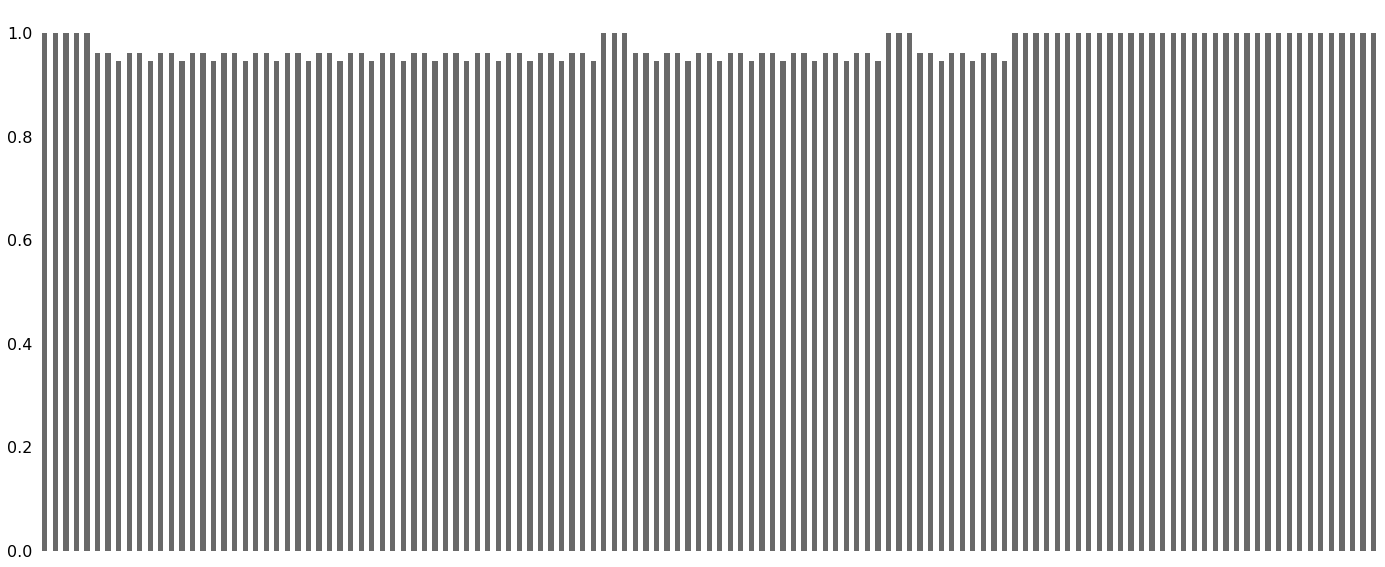

In [36]:
# lets visualize the missing values
msno.bar(tele)
plt.show()

#### All the missing values are between 3% to 5% so we can just interpolate the missing values as it won't effect our analysis and keep the purity of the data intact.

In [37]:
# column with missing values
col=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']

In [38]:
# interpolating all the missing value columns
for i in col:
    tele[i]=tele[i].interpolate(method='polynomial', order=2)

In [39]:
# let's check the shape of the data frame after dropping missing values
tele.shape

(99999, 127)

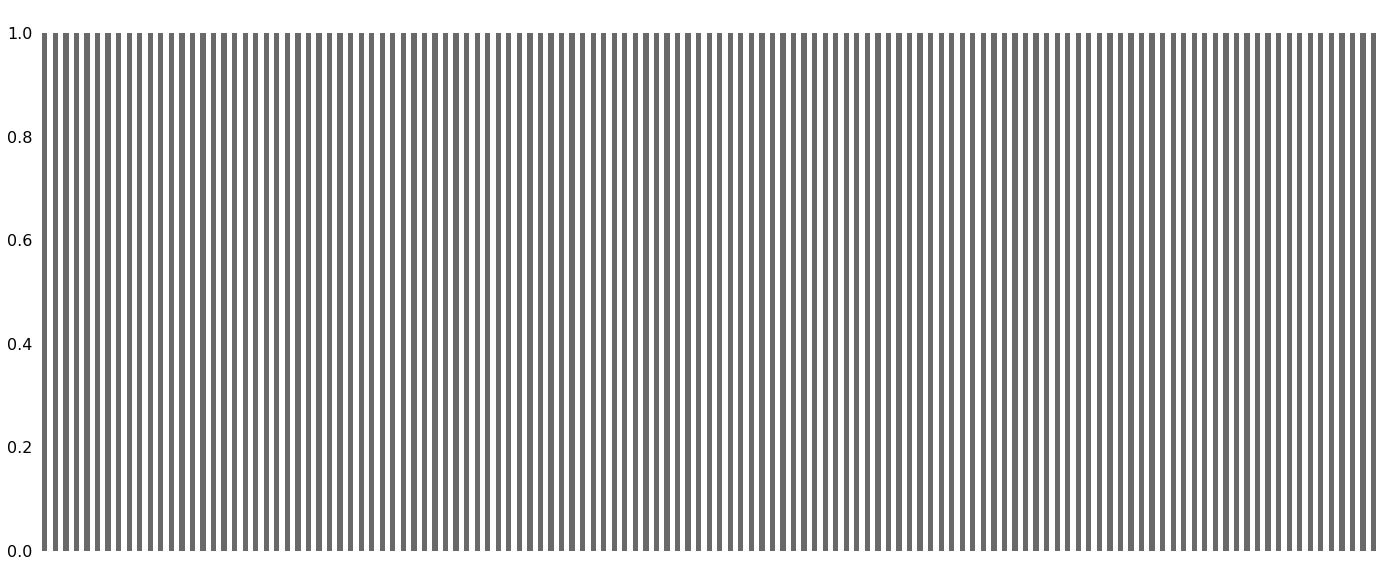

In [40]:
# lets visualize the missing values
msno.bar(tele)
plt.show()

####  We are good to go for next step as all the missing values are resolved now.

#### Outlier handling 

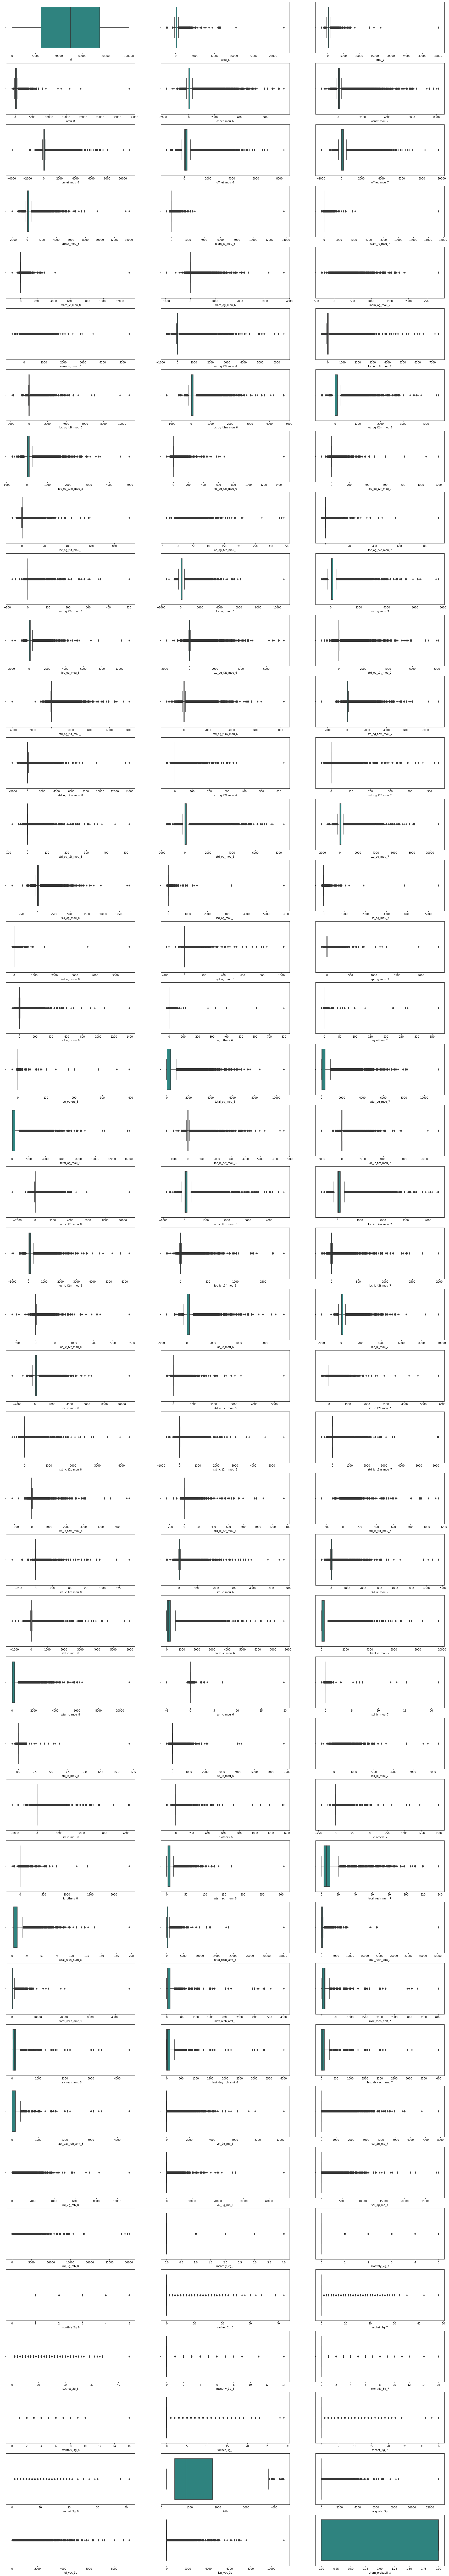

In [41]:
# Making box plot for the data
plt.figure(figsize = (30,180))
feature = tele.columns[1:]
for i in enumerate(feature):
    plt.subplot(42,3, i[0]+1)
    sns.boxplot(tele[i[1]],palette='viridis')

In [42]:
# columns for outlier handling
upper_cap_cols=['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [43]:
# Capping the data
for col in upper_cap_cols:
    upper_limit = tele[col].mean() + (3*tele[col].std())
    lower_limit = tele[col].mean() - (3*tele[col].std())
    # capping upper bound 
    tele[col][tele[col]<lower_limit] = lower_limit
    # capping Lower bound
    tele[col][tele[col]>upper_limit] = upper_limit
    

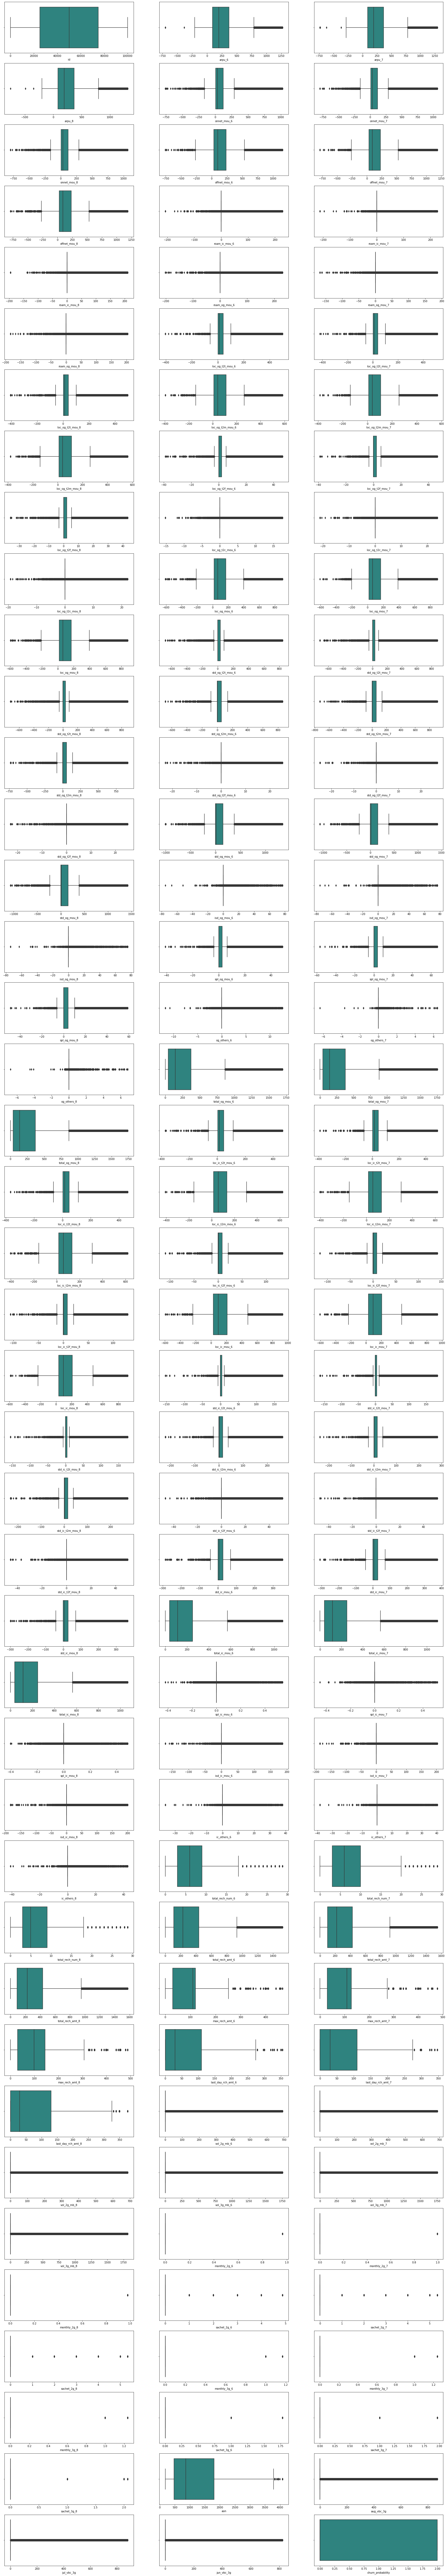

In [44]:
# plotting the data again to check if outliers are handled
plt.figure(figsize = (30,180))
feature = tele.columns[1:]
for i in enumerate(feature):
    plt.subplot(42,3, i[0]+1)
    sns.boxplot(tele[i[1]],palette='viridis')

#### So from the above plot we can see that outliers are handled and our data looks continuous now. 

### Step 4 : EDA and Data Modifications

In [45]:
# making a copy of the data frame as it can be useful later
tele1=tele.copy()

#### As we have three columns of each type which represent differnt months let's take there average and make them as single column to reduce number of columns and multicollinearity. 

In [46]:
# Making modified columns
tele['arpu_Avg']=(tele['arpu_6']+tele['arpu_7']+tele['arpu_8'])/3
tele['onnet_mou_Avg']=(tele['onnet_mou_6']+tele['onnet_mou_7']+tele['onnet_mou_8'])/3
tele['offnet_mou_Avg']=(tele['offnet_mou_6']+tele['offnet_mou_7']+tele['offnet_mou_8'])/3
tele['roam_ic_mou_Avg']=(tele['roam_ic_mou_6']+tele['roam_ic_mou_7']+tele['roam_ic_mou_8'])/3
tele['roam_og_mou_Avg']=(tele['roam_og_mou_6']+tele['roam_og_mou_7']+tele['roam_og_mou_8'])/3
tele['loc_og_t2t_mou_Avg']=(tele['loc_og_t2t_mou_6']+tele['loc_og_t2t_mou_7']+tele['loc_og_t2t_mou_8'])/3
tele['loc_og_t2m_mou_Avg']=(tele['loc_og_t2m_mou_6']+tele['loc_og_t2m_mou_7']+tele['loc_og_t2m_mou_8'])/3
tele['loc_og_t2f_mou_Avg']=(tele['loc_og_t2f_mou_6']+tele['loc_og_t2f_mou_7']+tele['loc_og_t2f_mou_8'])/3
tele['loc_og_t2c_mou_Avg']=(tele['loc_og_t2c_mou_6']+tele['loc_og_t2c_mou_7']+tele['loc_og_t2c_mou_8'])/3
tele['loc_og_mou_Avg']=(tele['loc_og_mou_6']+tele['loc_og_mou_7']+tele['loc_og_mou_8'])/3
tele['std_og_t2t_mou_Avg']=(tele['std_og_t2t_mou_6']+tele['std_og_t2t_mou_7']+tele['std_og_t2t_mou_8'])/3
tele['std_og_t2m_mou_Avg']=(tele['std_og_t2m_mou_6']+tele['std_og_t2m_mou_7']+tele['std_og_t2m_mou_8'])/3
tele['std_og_t2f_mou_Avg']=(tele['std_og_t2f_mou_6']+tele['std_og_t2f_mou_7']+tele['std_og_t2f_mou_8'])/3
tele['std_og_mou_Avg']=(tele['std_og_mou_6']+tele['std_og_mou_7']+tele['std_og_mou_8'])/3
tele['isd_og_mou_Avg']=(tele['isd_og_mou_6']+tele['isd_og_mou_7']+tele['isd_og_mou_8'])/3
tele['spl_og_mou_Avg']=(tele['spl_og_mou_6']+tele['spl_og_mou_7']+tele['spl_og_mou_8'])/3
tele['og_others_Avg']=(tele['og_others_6']+tele['og_others_7']+tele['og_others_8'])/3
tele['total_og_mou_Avg']=(tele['total_og_mou_6']+tele['total_og_mou_7']+tele['total_og_mou_8'])/3
tele['loc_ic_t2t_mou_Avg']=(tele['loc_ic_t2t_mou_6']+tele['loc_ic_t2t_mou_7']+tele['loc_ic_t2t_mou_8'])/3
tele['loc_ic_t2m_mou_Avg']=(tele['loc_ic_t2m_mou_6']+tele['loc_ic_t2m_mou_7']+tele['loc_ic_t2m_mou_8'])/3
tele['loc_ic_t2f_mou_Avg']=(tele['loc_ic_t2f_mou_6']+tele['loc_ic_t2f_mou_7']+tele['loc_ic_t2f_mou_8'])/3
tele['loc_ic_mou_Avg']=(tele['loc_ic_mou_6']+tele['loc_ic_mou_7']+tele['loc_ic_mou_8'])/3
tele['std_ic_t2t_mou_Avg']=(tele['std_ic_t2t_mou_6']+tele['std_ic_t2t_mou_7']+tele['std_ic_t2t_mou_8'])/3
tele['std_ic_t2m_mou_Avg']=(tele['std_ic_t2m_mou_6']+tele['std_ic_t2m_mou_7']+tele['std_ic_t2m_mou_8'])/3
tele['std_ic_t2f_mou_Avg']=(tele['std_ic_t2f_mou_6']+tele['std_ic_t2f_mou_7']+tele['std_ic_t2f_mou_8'])/3
tele['std_ic_mou_Avg']=(tele['std_ic_mou_6']+tele['std_ic_mou_7']+tele['std_ic_mou_8'])/3
tele['total_ic_mou_Avg']=(tele['total_ic_mou_6']+tele['total_ic_mou_7']+tele['total_ic_mou_8'])/3
tele['spl_ic_mou_Avg']=(tele['spl_ic_mou_6']+tele['spl_ic_mou_7']+tele['spl_ic_mou_8'])/3
tele['isd_ic_mou_Avg']=(tele['isd_ic_mou_6']+tele['isd_ic_mou_7']+tele['isd_ic_mou_8'])/3
tele['ic_others_Avg']=(tele['ic_others_6']+tele['ic_others_7']+tele['ic_others_8'])/3
tele['total_rech_num_Avg']=(tele['total_rech_num_6']+tele['total_rech_num_7']+tele['total_rech_num_8'])/3
tele['total_rech_amt_Avg']=(tele['total_rech_amt_6']+tele['total_rech_amt_7']+tele['total_rech_amt_8'])/3
tele['max_rech_amt_Avg']=(tele['max_rech_amt_6']+tele['max_rech_amt_7']+tele['max_rech_amt_8'])/3
tele['last_day_rch_amt_Avg']=(tele['last_day_rch_amt_6']+tele['last_day_rch_amt_7']+tele['last_day_rch_amt_8'])/3
tele['vol_2g_mb_Avg']=(tele['vol_2g_mb_6']+tele['vol_2g_mb_7']+tele['vol_2g_mb_8'])/3
tele['vol_3g_mb_Avg']=(tele['vol_3g_mb_6']+tele['vol_3g_mb_7']+tele['vol_3g_mb_8'])/3
tele['monthly_2g_Avg']=(tele['monthly_2g_6']+tele['monthly_2g_7']+tele['monthly_2g_8'])/3
tele['sachet_2g_Avg']=(tele['sachet_2g_6']+tele['sachet_2g_7']+tele['sachet_2g_8'])/3
tele['monthly_3g_Avg']=(tele['monthly_3g_6']+tele['monthly_3g_7']+tele['monthly_3g_8'])/3
tele['sachet_3g_Avg']=(tele['sachet_3g_6']+tele['sachet_3g_7']+tele['sachet_3g_8'])/3
tele['Avg_vbc_3g']=(tele['aug_vbc_3g']+tele['jul_vbc_3g']+tele['jun_vbc_3g'])/3

In [47]:
# droping all the old columns
tele.drop([ 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8',  'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'
       ],1,inplace=True)

In [48]:
tele.shape

(99999, 45)

In [49]:
# dividing train and test set
tele_test=tele.iloc[tele[tele['id']==69999].index[0]:tele[tele['id']==99998].index[0]+1,:]
tele_train=tele.iloc[tele[tele['id']==0].index[0]:tele[tele['id']==69999].index[0],:]

print(tele_test.shape)
print(tele_train.shape)

(30000, 45)
(69999, 45)


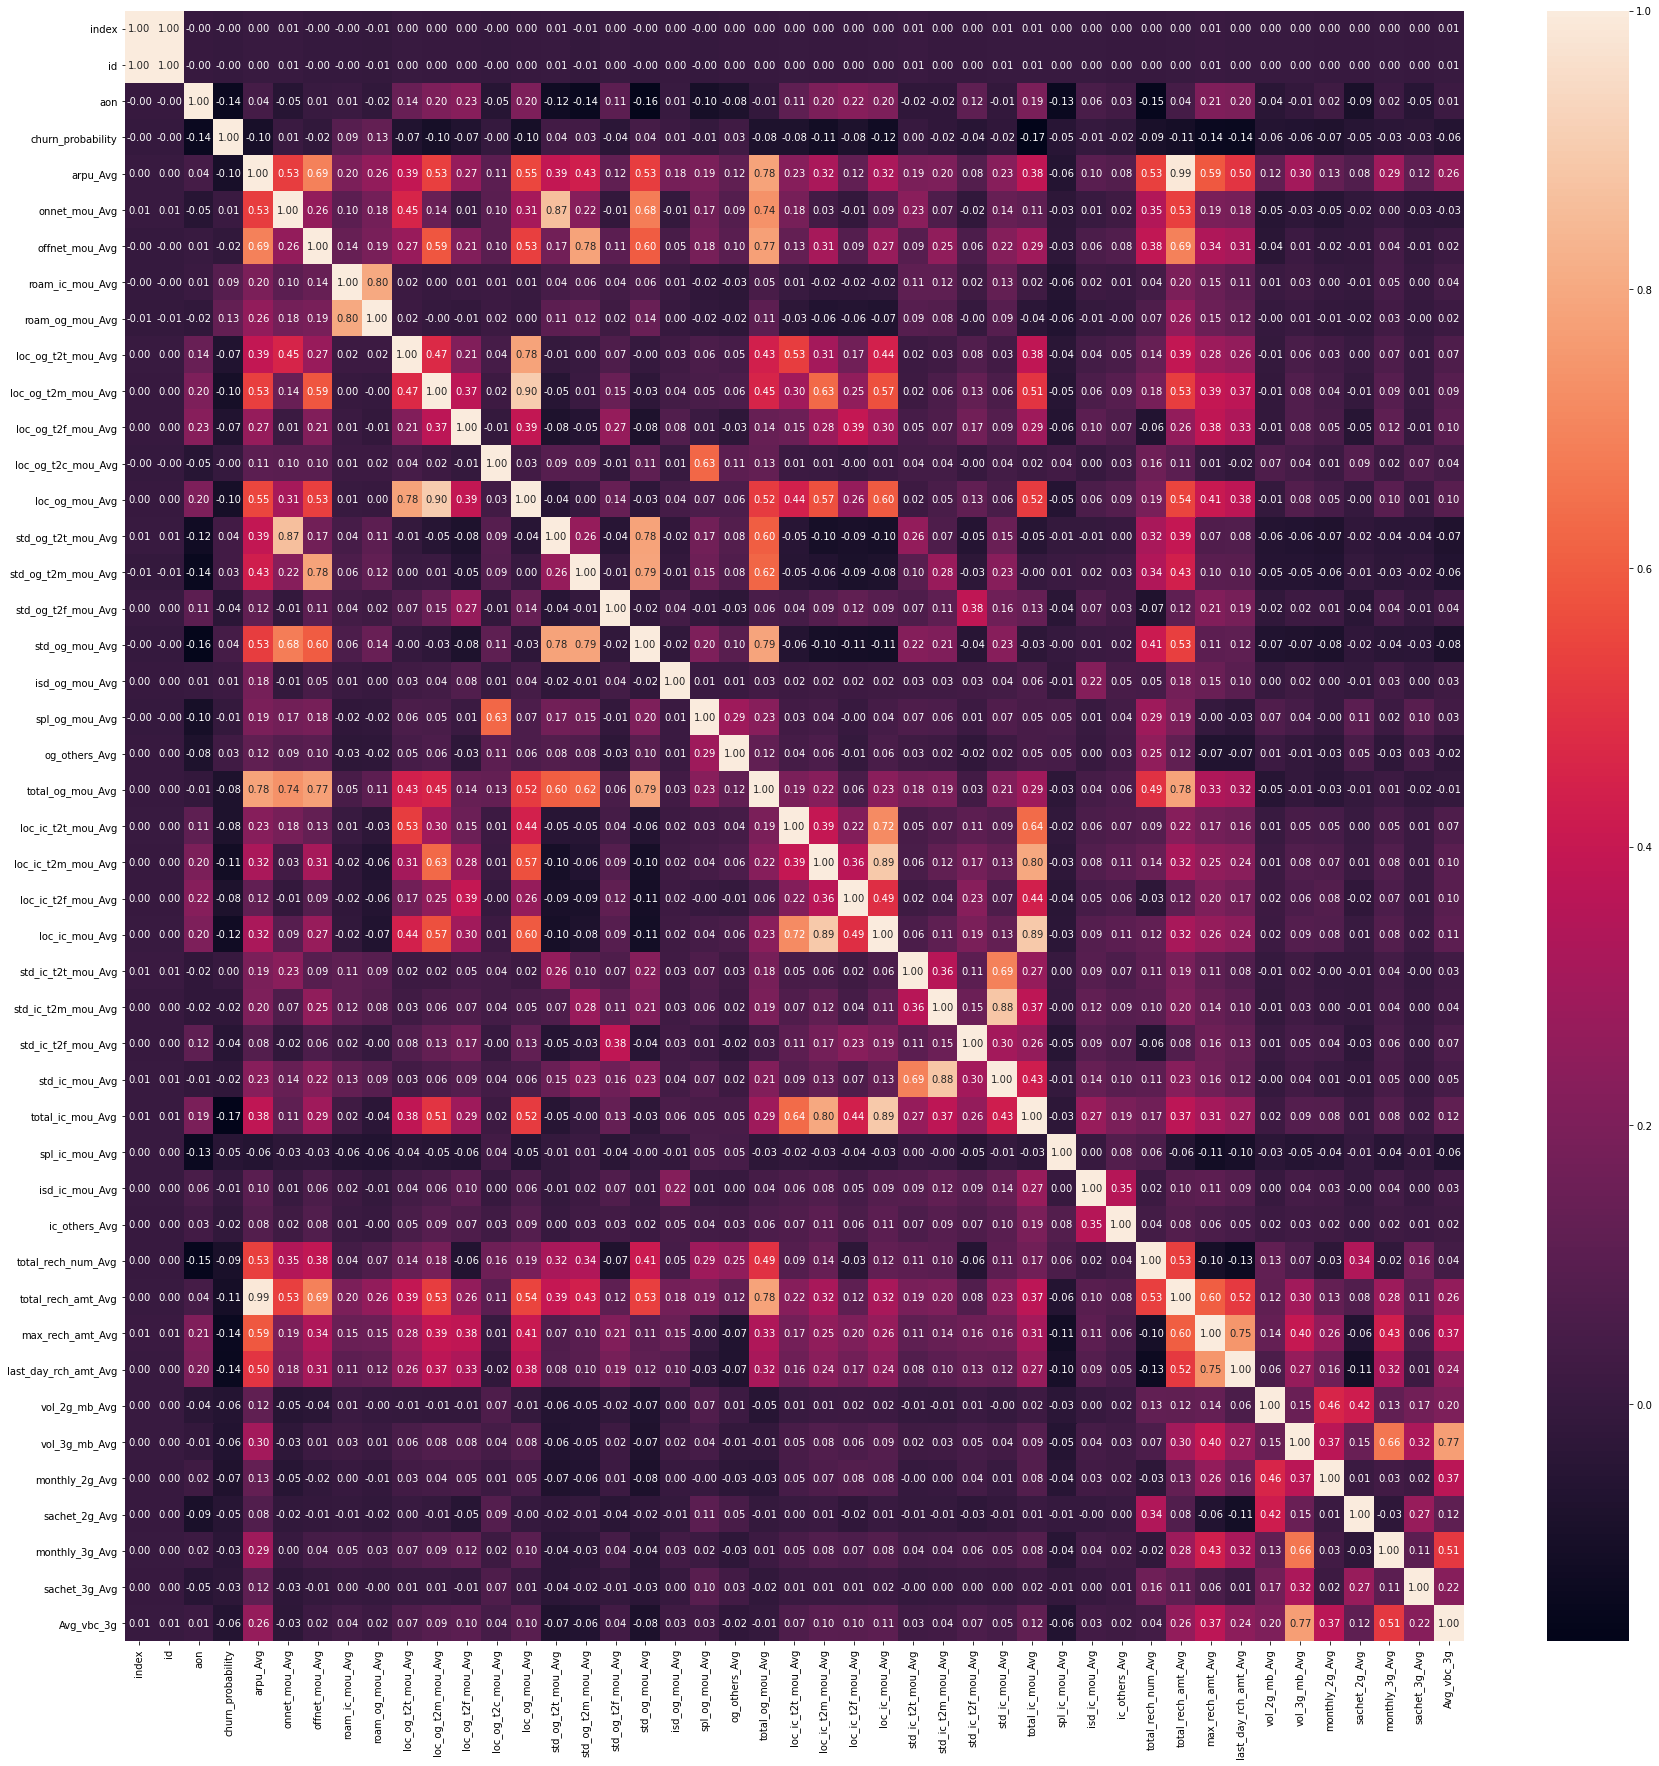

In [50]:
# let's plot heat map of train data frame
plt.figure(figsize=[30,30])
sns.heatmap(tele_train.corr(),annot=True,fmt='.2f')
plt.show()

#### Inference:
These columns have high correlation :
- arpu_avg and total_rech_amt_avg
- total_ic_mou_avg and loc_ic_mou_avg
- std_ic_mou_avg and std_ic_t2m_mou_avg
- loc_ic_mou_avg and loc_ic_t2m_mou_avg
- roam_og_mou_avg and roam_ic_mou_avg
- loc_og_mou_avg and loc_og_t2m_mou_avg



#### We won't drop these columns as we don't want to lose information, we will take care of multicollinearity in later steps. 

#### Let's analyze the column which are highly correlated with churn probablity. 

In [51]:
# function for numerical bivariate analysis
def uni_numerical(df0,z):
    plt.figure(figsize=[15,6])
    plt.title('Density plot of {} column'.format(z))
    plt.ylabel('Density')
    df1=df0[df0['churn_probability']==0]
    df2=df0[df0['churn_probability']==1]
    sns.distplot(df1[z],hist=False,label='Not-Churned')
    sns.distplot(df2[z],hist=False,label='Churned')
    plt.show()
    print('\n\n')
    print('Median of {} column for Not-Churned case is {}'.format(z,df1[z].median()))
    print('Median of {} column for Churned case is {}'.format(z,df2[z].median()))

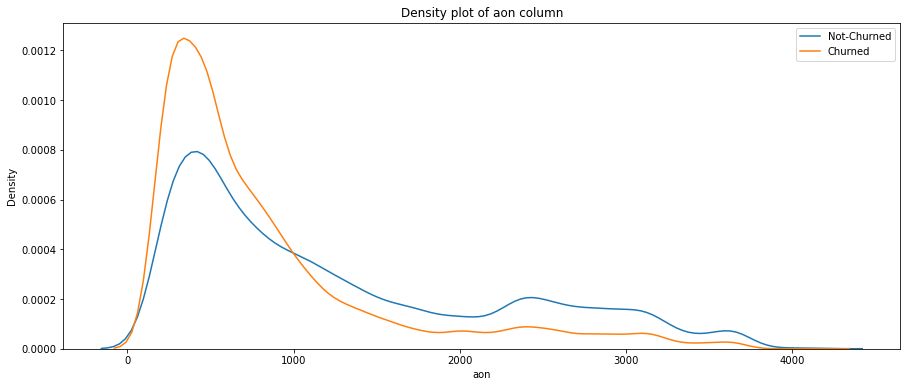




Median of aon column for Not-Churned case is 925.0
Median of aon column for Churned case is 570.5


In [52]:
# bivariate analysis of aon column
uni_numerical(tele_train,'aon')

#### Inference :
- As the area of network increases the churn case decreases.

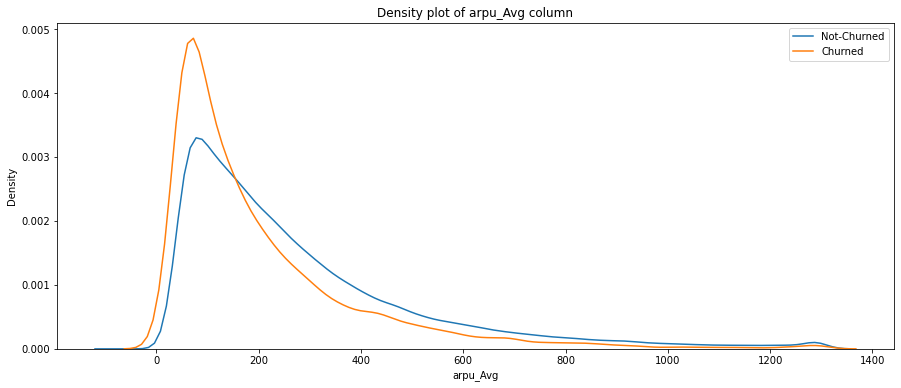




Median of arpu_Avg column for Not-Churned case is 207.429
Median of arpu_Avg column for Churned case is 139.61450000000002


In [53]:
# bivariate analysis of arpu_Avg column
uni_numerical(tele_train,'arpu_Avg')

#### Inference:
- We can see that non churn cases have high average revenue per user.

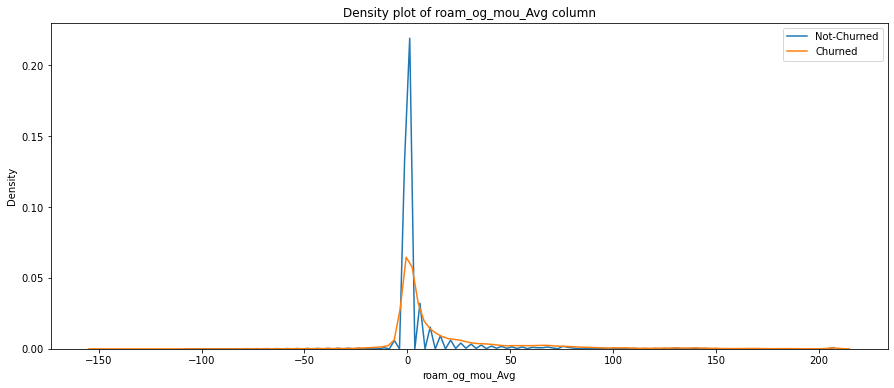




Median of roam_og_mou_Avg column for Not-Churned case is 0.0
Median of roam_og_mou_Avg column for Churned case is 3.1596827951749127


In [54]:
# bivariate analysis of roam_og_mou_Avg column
uni_numerical(tele_train,'roam_og_mou_Avg')

#### Inference:
- We can say that churn cases are high if user is doing outgoing call in roaming. 

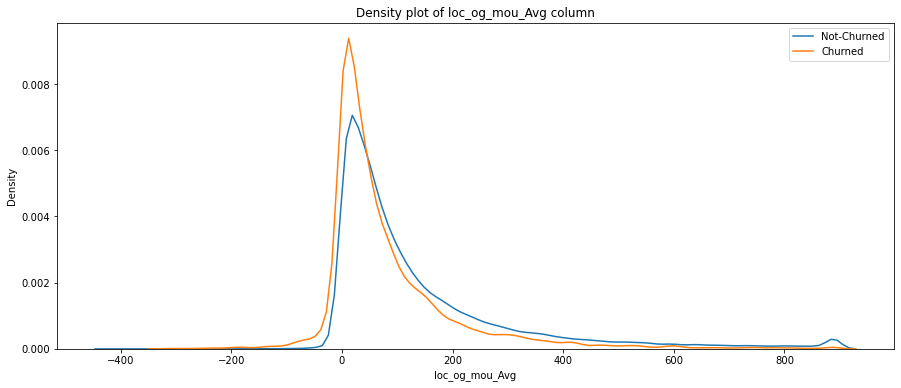




Median of loc_og_mou_Avg column for Not-Churned case is 74.58
Median of loc_og_mou_Avg column for Churned case is 42.70218151063099


In [55]:
# bivariate analysis of loc_og_mou_Avg column
uni_numerical(tele_train,'loc_og_mou_Avg')

#### Inference :
- We can say that non churn customer use more of this network for local outgoing calls and less for roaming calls.

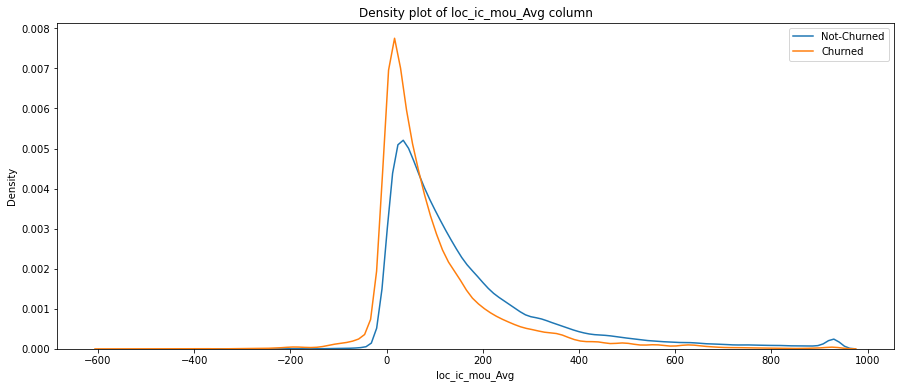




Median of loc_ic_mou_Avg column for Not-Churned case is 105.43666666666667
Median of loc_ic_mou_Avg column for Churned case is 54.824714305204736


In [56]:
# bivariate analysis of loc_ic_mou_Avg column
uni_numerical(tele_train,'loc_ic_mou_Avg')

#### Inference:
- We can see similar trend here that non churning user are using this network more for local incoming and outgoing calls.

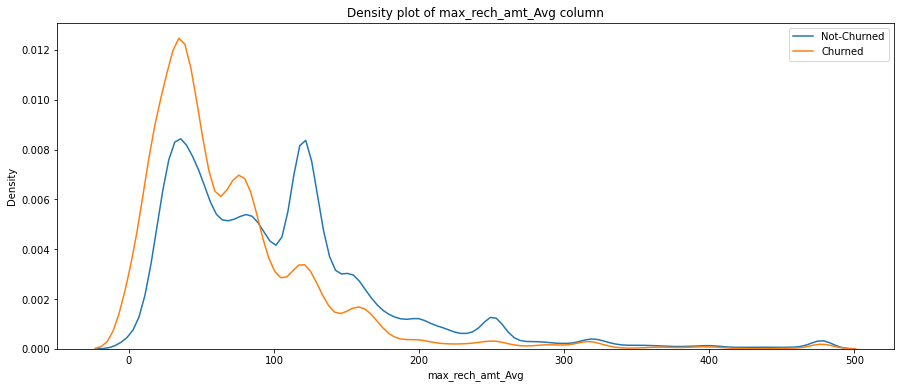




Median of max_rech_amt_Avg column for Not-Churned case is 90.0
Median of max_rech_amt_Avg column for Churned case is 50.0


In [57]:
# bivariate analysis of max_rech_amt_Avg column
uni_numerical(tele_train,'max_rech_amt_Avg')

#### Inference:
- We can say that non churning customers have higher max recharge amounts.

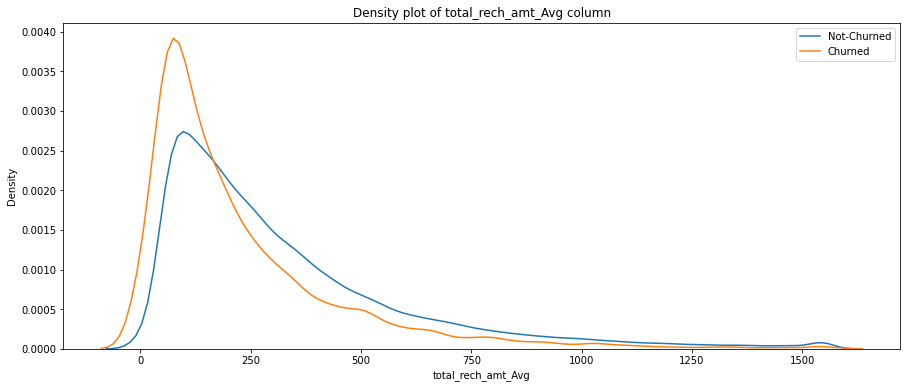




Median of total_rech_amt_Avg column for Not-Churned case is 240.0
Median of total_rech_amt_Avg column for Churned case is 152.0


In [58]:
# bivariate analysis of total_rech_amt_Avg column
uni_numerical(tele_train,'total_rech_amt_Avg')

#### Inferece:
- We can see that non churn customers have done more amount of total recharge.

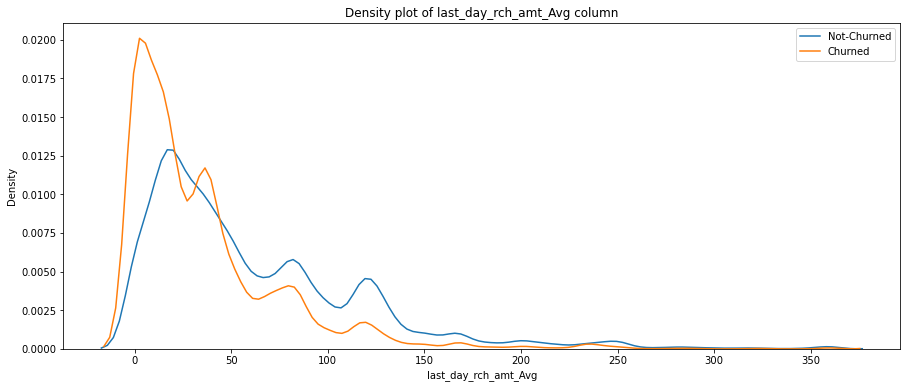




Median of last_day_rch_amt_Avg column for Not-Churned case is 43.333333333333336
Median of last_day_rch_amt_Avg column for Churned case is 21.333333333333332


In [59]:
# bivariate analysis of last_day_rch_amt_Avg column
uni_numerical(tele_train,'last_day_rch_amt_Avg')

#### Inference :
- Non churn case have high last day recharge amount.

### Step 5 : Preparing data for modeling

In [60]:
# let's create X and y
y=tele_train.pop('churn_probability')
X=tele_train

In [61]:
# checking if X is created properly
X.shape

(69999, 44)

In [62]:
# checking if y is created properly
y.shape

(69999,)

#### Handling class imbalance 

In [63]:
# Applying SMOTE oversampling to the data
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [64]:
# Checking if X_sm is created properly
X_sm.shape

(125734, 44)

In [65]:
# checking if class imbalance is resolved
y_sm.value_counts(normalize=True)

1    0.5
0    0.5
Name: churn_probability, dtype: float64

#### We have resolved class imbalance. 

In [66]:
# we wanted to drop column with 90% same values but as our data was imbalanced we could not decide if it was important or not 
# so now we can safely drop such columns
X_sm.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

,index,id,aon,arpu_Avg,onnet_mou_Avg,offnet_mou_Avg,roam_ic_mou_Avg,roam_og_mou_Avg,loc_og_t2t_mou_Avg,loc_og_t2m_mou_Avg,loc_og_t2f_mou_Avg,loc_og_t2c_mou_Avg,loc_og_mou_Avg,std_og_t2t_mou_Avg,std_og_t2m_mou_Avg,std_og_t2f_mou_Avg,std_og_mou_Avg,isd_og_mou_Avg,spl_og_mou_Avg,og_others_Avg,total_og_mou_Avg,loc_ic_t2t_mou_Avg,loc_ic_t2m_mou_Avg,loc_ic_t2f_mou_Avg,loc_ic_mou_Avg,std_ic_t2t_mou_Avg,std_ic_t2m_mou_Avg,std_ic_t2f_mou_Avg,std_ic_mou_Avg,total_ic_mou_Avg,spl_ic_mou_Avg,isd_ic_mou_Avg,ic_others_Avg,total_rech_num_Avg,total_rech_amt_Avg,max_rech_amt_Avg,last_day_rch_amt_Avg,vol_2g_mb_Avg,vol_3g_mb_Avg,monthly_2g_Avg,sachet_2g_Avg,monthly_3g_Avg,sachet_3g_Avg,Avg_vbc_3g
count,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,1.257340e+05,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000,125734.000000
mean,34932.913389,34932.913389,1042.670276,234.391263,117.751745,172.834742,8.188469,12.042323,31.756622,68.675638,2.460190,1.032876,105.388671,74.955365,82.266790,0.617054,167.355374,4.150820e-01,3.897722,0.159103,250.440025,33.422589,80.529744,7.852867,124.936078,7.680756,16.264635,1.211404,26.177747,138.873198,0.036511,4.937339,0.548811,6.640782,267.849843,84.890754,46.855394,30.374102,75.294425,0.050327,0.272448,0.047071,0.043593,37.110585
std,20217.318458,20217.318458,874.785233,210.255290,182.202712,202.494941,22.311867,25.976043,60.929512,93.598045,5.927198,2.227400,144.366405,151.920413,151.227276,2.457556,263.454377,3.529416e+00,6.633191,0.463797,311.259278,57.226647,99.967939,18.038597,152.264444,18.064657,31.710507,4.497059,45.934887,176.863924,0.069415,19.363120,2.259463,4.682462,248.669222,68.472385,47.928483,91.245875,241.483482,0.169512,0.763958,0.172995,0.181568,121.770016
min,0.000000,0.000000,180.000000,-54.532023,-784.831375,-779.680084,-135.913706,-146.913722,-282.981963,-303.170839,-35.652512,-18.542955,-408.654802,-703.355620,-714.755809,-23.663980,-1045.816614,-4.756966e+01,-32.552762,-4.021370,0.000000,-376.175423,-405.131481,-94.686599,-560.760795,-153.163087,-162.477663,-46.689757,-272.863140,0.000000,-0.217192,-173.734264,-27.152678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17304.000000,17304.000000,405.043460,89.890214,15.102271,46.593662,0.000000,0.000000,3.483333,13.126667,0.000000,0.000000,21.043333,0.000000,1.176667,0.000000,3.571520,0.000000e+00,0.053333,0.000000,52.517091,4.786667,18.666667,0.083333,30.308477,0.000000,0.810000,0.000000,2.380000,29.106667,0.000000,0.000000,0.000000,3.596912,98.666667,36.666667,14.377070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34887.500000,34887.500000,694.377719,163.636833,47.890479,102.278333,0.351483,0.777852,12.430000,36.969361,0.343333,0.073208,56.330000,10.058477,20.011667,0.000000,52.500000,0.000000e+00,1.449905,0.000000,130.320689,15.296667,47.538333,1.513665,74.800609,1.563333,5.676920,0.000000,10.989521,76.632252,0.000000,0.000000,0.001622,5.333333,184.780668,66.666667,32.124504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52452.000000,52452.000000,1365.478582,302.379879,136.875042,219.187582,5.703333,12.234604,33.730000,85.713327,2.243333,1.138400,129.329184,74.659229,91.228068,0.103219,225.278401,6.164038e-14,4.951131,0.050142,322.562137,38.443333,103.705000,7.313333,160.772189,7.500339,18.078041,0.558725,30.256927,175.455019,0.050211,1.233156,0.220000,8.333333,349.435311,116.666667,65.666667,5.831084,0.000000,0.000000,0.028059,0.000000,0.000000,0.000000
90%,62

In [67]:
# dropping columns with 90% same values and id column as it is not needed for analysis
X_sm.drop(['index','id','monthly_3g_Avg','sachet_3g_Avg'],1,inplace=True)

In [68]:
# droping column from test set
tele_test.drop(['index','id','monthly_3g_Avg','sachet_3g_Avg','churn_probability'],1,inplace=True)

In [69]:
# checking the final shape of X_sm
X_sm.shape

(125734, 40)

In [70]:
tele_test.shape

(30000, 40)

#### Standard Scaling the train and test data

In [71]:
col_list=list(X_sm.columns)

In [72]:
# standard scaling the numerical variable
scaler = StandardScaler()
X_sm[col_list] = scaler.fit_transform(X_sm[col_list])
X_sm.head()

,aon,arpu_Avg,onnet_mou_Avg,offnet_mou_Avg,roam_ic_mou_Avg,roam_og_mou_Avg,loc_og_t2t_mou_Avg,loc_og_t2m_mou_Avg,loc_og_t2f_mou_Avg,loc_og_t2c_mou_Avg,loc_og_mou_Avg,std_og_t2t_mou_Avg,std_og_t2m_mou_Avg,std_og_t2f_mou_Avg,std_og_mou_Avg,isd_og_mou_Avg,spl_og_mou_Avg,og_others_Avg,total_og_mou_Avg,loc_ic_t2t_mou_Avg,loc_ic_t2m_mou_Avg,loc_ic_t2f_mou_Avg,loc_ic_mou_Avg,std_ic_t2t_mou_Avg,std_ic_t2m_mou_Avg,std_ic_t2f_mou_Avg,std_ic_mou_Avg,total_ic_mou_Avg,spl_ic_mou_Avg,isd_ic_mou_Avg,ic_others_Avg,total_rech_num_Avg,total_rech_amt_Avg,max_rech_amt_Avg,last_day_rch_amt_Avg,vol_2g_mb_Avg,vol_3g_mb_Avg,monthly_2g_Avg,sachet_2g_Avg,Avg_vbc_3g
0,1.046352,-0.915337,-0.327485,-0.637474,-0.367002,-0.463595,-0.507473,-0.649471,-0.415070,-0.463715,-0.669563,-0.116588,-0.324988,-0.251086,-0.292242,-0.117607,-0.143881,-0.069937,-0.476347,-0.503076,-0.676117,-0.435339,-0.705088,-0.280886,-0.067422,-0.269378,-0.205460,-0.586479,1.798932,-0.254988,0.022656,-0.919915,-0.873385,-0.558243,-0.073486,-0.332883,-0.311801,-0.296895,-0.356629,-0.304761
1,-0.380289,-0.852037,-0.646270,-0.759897,-0.367002,-0.463595,-0.521205,-0.733732,-0.415070,6.142556,-0.730011,-0.493388,-0.543997,-0.251086,-0.635237,-0.117607,2.547644,-0.343046,-0.737791,-0.401725,-0.701592,-0.335367,-0.671856,-0.425183,-0.512912,-0.269378,-0.569890,-0.657193,-0.477966,-0.254988,-0.242895,-0.563975,-0.815745,-0.290494,-0.977615,0.956349,-0.306334,-0.296895,-0.356629,-0.304761
2,-0.183669,-0.854824,-0.616157,-0.629589,-0.367002,-0.463595,-0.447294,-0.647868,-0.415070,-0.143460,-0.643149,-0.486937,-0.299353,-0.251086,-0.491088,-0.117607,-0.373033,-0.343046,-0.637702,-0.484087,-0.343576,-0.435339,-0.479602,-0.209476,-0.228357,-0.269378,-0.288549,-0.418138,-0.525987,-0.254988,-0.206013,-0.848727,-0.822447,-0.558243,-0.143034,-0.332883,-0.311801,-0.296895,-0.356629,-0.304761
3,-0.069355,-0.365362,-0.603699,-0.528467,-0.367002,-0.442678,-0.461409,-0.354699,-0.415070,0.737989,-0.458987,-0.466356,-0.442912,-0.175129,-0.560904,-0.117607,1.909437,-0.343046,-0.562738,-0.271249,-0.287524,-0.286768,-0.345186,-0.425183,-0.386981,-0.269378,-0.482955,-0.353361,-0.525987,-0.254988,-0.242895,-0.777539,-0.366686,0.074618,0.900191,-0.332883,-0.311801,-0.296895,-0.356629,-0.304761
4,-0.452307,-0.368934,-0.587288,-0.681130,0.434368,-0.261742,-0.405661,-0.515671,0.610152,1.010356,-0.497708,-0.493388,-0.534408,-0.251086,-0.629733,-0.117607,0.266682,-0.343046,-0.673996,-0.528764,-0.690855,-0.152980,-0.690902,-0.425183,-0.512912,-0.269378,-0.569890,-0.673608,-0.525987,-0.254988,-0.242895,0.788595,-0.342558,-0.650738,-0.525550,3.003025,-0.311801,-0.296895,6.437200,-0.304761


In [73]:
# making a copy of this data frame
X_sm1=X_sm.copy()

In [74]:
# Standard scaling test data set
tele_test[col_list] = scaler.transform(tele_test[col_list])

In [75]:
tele_test.head()

,aon,arpu_Avg,onnet_mou_Avg,offnet_mou_Avg,roam_ic_mou_Avg,roam_og_mou_Avg,loc_og_t2t_mou_Avg,loc_og_t2m_mou_Avg,loc_og_t2f_mou_Avg,loc_og_t2c_mou_Avg,loc_og_mou_Avg,std_og_t2t_mou_Avg,std_og_t2m_mou_Avg,std_og_t2f_mou_Avg,std_og_mou_Avg,isd_og_mou_Avg,spl_og_mou_Avg,og_others_Avg,total_og_mou_Avg,loc_ic_t2t_mou_Avg,loc_ic_t2m_mou_Avg,loc_ic_t2f_mou_Avg,loc_ic_mou_Avg,std_ic_t2t_mou_Avg,std_ic_t2m_mou_Avg,std_ic_t2f_mou_Avg,std_ic_mou_Avg,total_ic_mou_Avg,spl_ic_mou_Avg,isd_ic_mou_Avg,ic_others_Avg,total_rech_num_Avg,total_rech_amt_Avg,max_rech_amt_Avg,last_day_rch_amt_Avg,vol_2g_mb_Avg,vol_3g_mb_Avg,monthly_2g_Avg,sachet_2g_Avg,Avg_vbc_3g
69999,0.742276,-0.763387,-0.508840,-0.644223,-0.367002,-0.463595,-0.159200,-0.600609,0.348644,-0.459226,-0.459518,-0.473750,-0.376169,-0.251086,-0.527577,-0.117607,-0.586104,-0.343046,-0.587990,-0.060565,-0.724433,-0.430534,-0.569906,-0.425183,-0.452574,-0.269378,-0.528237,-0.556116,5.572595,-0.254988,-0.242895,-0.421599,-0.737997,-0.704288,-0.560324,-0.332883,-0.311801,-0.296895,-0.356629,-0.304761
70000,1.703659,0.931300,-0.396438,1.601060,-0.367002,-0.463595,0.225891,4.312318,-0.374016,-0.463715,2.932582,-0.493388,-0.452655,-0.251086,-0.582805,-0.042051,-0.587611,-0.343046,0.939403,-0.295422,0.752580,-0.407805,0.314261,-0.425183,-0.381409,-0.269378,-0.479109,0.944252,-0.525987,6.402712,-0.242895,-0.421599,0.933574,2.411336,0.761094,-0.332883,-0.311801,-0.296895,-0.356629,-0.304761
70001,-0.875270,1.280660,-0.602729,-0.676027,1.907880,1.238621,-0.521205,-0.733732,-0.415070,-0.463715,-0.730011,-0.493388,-0.543997,-0.251086,-0.635237,-0.117607,-0.587611,-0.343046,-0.804606,-0.584041,-0.805559,-0.435339,-0.820524,-0.425183,-0.512912,-0.269378,-0.569890,-0.785201,-0.525987,-0.254988,-0.242895,0.005528,2.274048,4.927007,-0.977615,-0.332883,-0.311801,-0.296895,-0.356629,3.872146
70002,0.230149,-0.735353,-0.632604,-0.410620,-0.367002,-0.463595,-0.492155,-0.299035,-0.282910,0.461133,-0.430471,-0.488648,-0.254255,-0.251086,-0.466175,-0.117607,0.074717,-0.343046,-0.508442,0.206910,4.011705,-0.398011,2.643989,-0.346576,-0.193984,-0.269378,-0.318809,2.281689,-0.525987,-0.081461,-0.242895,-0.706351,-0.581162,0.025936,0.830642,-0.332883,-0.311801,-0.296895,-0.356629,-0.304761
70003,-0.663789,0.671089,2.574770,-0.591892,-0.367002,-0.463595,-0.434820,-0.676786,-0.415070,-0.463715,-0.656610,3.335014,-0.229017,-0.251086,1.753231,-0.117607,-0.031818,1.238113,1.265327,-0.524220,-0.715363,-0.435339,-0.738801,3.808884,0.120950,-0.150040,1.544705,-0.165287,-0.525987,-0.254988,-0.219291,0.432656,0.788803,0.464071,1.178384,-0.332883,-0.311801,-0.296895,-0.356629,-0.304761


### Step 6 : Model building 

#### Making model for Inference (Base model)

In [76]:
# Making a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_sm, y_sm)

LogisticRegression(random_state=42)

#### Feature selection using RFECV

In [77]:
# feature selection usign RFECV
rfecv = RFECV(estimator=logreg,n_jobs=-1)

In [78]:
rfecv.fit(X_sm, y_sm)

RFECV(estimator=LogisticRegression(random_state=42), n_jobs=-1)

In [79]:
num_features = X_sm.shape
num_features[1]

40

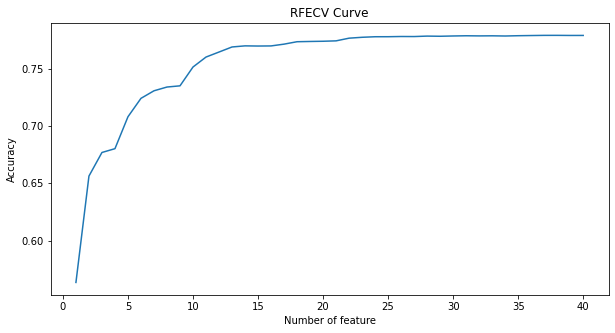

In [80]:
#plotting the RFECV grid score
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.xlabel('Number of feature')
plt.ylabel('Accuracy')
plt.title('RFECV Curve')
plt.show()

#### We can see here that 13 features are giving us almost the highest  accuracy so let's make a model using 13 features in RFE. 

In [81]:
rfe = RFE(estimator=logreg, n_features_to_select=13)
rfe.fit(X_sm, y_sm)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=13)

In [82]:
# cross_val_score for logistic regression model with 13 features
cross_val_score(rfe, X_sm, y_sm, cv=4)

array([0.76150029, 0.7672902 , 0.77390004, 0.77202303])

In [83]:
# lets check top 13 columns
col = X_sm.columns[rfe.support_]
col

Index(['aon', 'arpu_Avg', 'roam_og_mou_Avg', 'std_og_mou_Avg',
       'total_og_mou_Avg', 'loc_ic_mou_Avg', 'std_ic_mou_Avg',
       'total_ic_mou_Avg', 'isd_ic_mou_Avg', 'total_rech_num_Avg',
       'total_rech_amt_Avg', 'max_rech_amt_Avg', 'last_day_rch_amt_Avg'],
      dtype='object')

#### Model - 1  

In [84]:
import statsmodels.api as sm

In [85]:
# Assessing the model with StatsModels
X_sm=X_sm[col]
logm1 = sm.GLM(y_sm,sm.tools.tools.add_constant(X_sm) , family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125720
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63299.
Date:                Wed, 22 Dec 2021   Deviance:                   1.2660e+05
Time:                        20:06:00   Pearson chi2:                 4.25e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0859      0.007    -11.574      0.000      -0.100      -0.071
aon                     -0.3796      0.008    -48.106      0.000      -0.395      -0.364
arpu_Avg                 1.6081      0.055     29.380      0.000       1.501       1.715
roam_og_mou_Avg          0.5041      0.009     56.979      0.000       0.487       0.521
std_og_mou_Avg           0.7449      0.021     36.244      0.000       0.705       0.785
total_og_mou_Avg        -0.7438      0.026    -28.193      0.000      -0.795      -0.692
loc_ic_mou_Avg           1.2436      0.026     48.707      0.000       1.194       1.294
std_ic_mou_Avg           0.4844      0.012     40.629      0.000       0.461       0.508
total_ic_mou_Avg        -2.0313      0.031    -66.126      0.000      -2.092      -1.971
isd_ic_mou_Avg           0.3649      0.009     39.906      0.000       0.347       0.383
total_rech_num_Avg      -0.7559      0.012    -61.398      0.000      -0.780      -0.732
total_rech_amt_Avg      -0.8474      0.057    -14.869      0.000      -0.959      -0.736
max_rech_amt_Avg        -0.6036      0.015    -39.202      0.000      -0.634      -0.573
last_day_rch_amt_Avg    -0.6022      0.013    -45.902      0.000      -0.628      -0.576
========================================================================================
"""

In [86]:
# Getting the predicted values on the train set
y_sm_pred = res.predict(sm.tools.tools.add_constant(X_sm))
y_sm_pred[:10]

0    0.471639
1    0.632300
2    0.566026
3    0.355106
4    0.484059
5    0.264532
6    0.274400
7    0.179000
8    0.325343
9    0.054657
dtype: float64

In [87]:
# making the prediction table
y_train_pred_final = pd.DataFrame({'Actual':y_sm.values, 'probability':y_sm_pred})
y_train_pred_final['CustID'] = y_sm.index
y_train_pred_final.head()

,Actual,probability,CustID
0,0,0.471639,0
1,0,0.632300,1
2,0,0.566026,2
3,0,0.355106,3
4,0,0.484059,4


In [88]:
# Let's choose a random cutoff and make predictions
y_train_pred_final['Predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,Actual,probability,CustID,Predicted
0,0,0.471639,0,0
1,0,0.632300,1,1
2,0,0.566026,2,0
3,0,0.355106,3,0
4,0,0.484059,4,0


In [89]:
# checking out the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted )
print(confusion)

[[53333  9534]
 [20483 42384]]


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Let's see the sensitivity and specificity of our logistic regression model
sensititvity=TP / float(TP+FN)
specificity=TN / float(TN+FP)


In [92]:
# Let's check the overall accuracy.
print('Accuracy : ', round(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted),3))
print('Sensititvity : ', round(sensititvity,3))
print('Specificity : ', round(specificity,3))

Accuracy :  0.761
Sensititvity :  0.674
Specificity :  0.848


In [93]:
# checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_sm[col].values, i) for i in range(X_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_rech_amt_Avg,41.98
1,arpu_Avg,36.98
4,total_og_mou_Avg,6.68
7,total_ic_mou_Avg,6.66
5,loc_ic_mou_Avg,4.72
3,std_og_mou_Avg,3.87
11,max_rech_amt_Avg,3.73
12,last_day_rch_amt_Avg,2.67
9,total_rech_num_Avg,2.62
6,std_ic_mou_Avg,1.64


#### As  total_rech_amt_Avg column have high VIF we will drop it.

#### Model - 2

In [94]:
# dropping the column with highest vif value
X_sm=X_sm.drop('total_rech_amt_Avg',1) 
logm2 = sm.GLM(y_sm,sm.tools.tools.add_constant(X_sm), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125721
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63413.
Date:                Wed, 22 Dec 2021   Deviance:                   1.2683e+05
Time:                        20:06:04   Pearson chi2:                 3.95e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0882      0.007    -11.904      0.000      -0.103      -0.074
aon                     -0.3708      0.008    -47.295      0.000      -0.386      -0.355
arpu_Avg                 0.8715      0.022     39.784      0.000       0.829       0.914
roam_og_mou_Avg          0.4918      0.009     55.973      0.000       0.475       0.509
std_og_mou_Avg           0.7424      0.021     36.168      0.000       0.702       0.783
total_og_mou_Avg        -0.7805      0.026    -29.749      0.000      -0.832      -0.729
loc_ic_mou_Avg           1.2366      0.025     48.571      0.000       1.187       1.286
std_ic_mou_Avg           0.4895      0.012     41.145      0.000       0.466       0.513
total_ic_mou_Avg        -2.0239      0.031    -66.052      0.000      -2.084      -1.964
isd_ic_mou_Avg           0.3634      0.009     39.827      0.000       0.346       0.381
total_rech_num_Avg      -0.8003      0.012    -66.730      0.000      -0.824      -0.777
max_rech_amt_Avg        -0.6479      0.015    -42.970      0.000      -0.677      -0.618
last_day_rch_amt_Avg    -0.6278      0.013    -48.264      0.000      -0.653      -0.602
========================================================================================
"""

In [95]:
# Getting the predicted values on the train set
y_sm_pred = res.predict(sm.tools.tools.add_constant(X_sm))


# making the prediction table
y_train_pred_final = pd.DataFrame({'Actual':y_sm.values, 'probability':y_sm_pred})
y_train_pred_final['CustID'] = y_sm.index
y_train_pred_final.head()



# Let's choose a random cutoff and make predictions
y_train_pred_final['Predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

# checking out the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted )
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity and specificity of our logistic regression model
sensititvity=TP / float(TP+FN)
specificity=TN / float(TN+FP)


# Let's check the overall accuracy.
print('Accuracy : ', round(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted),3))
print('Sensititvity : ', round(sensititvity,3))
print('Specificity : ', round(specificity,3))

[[53211  9656]
 [20515 42352]]
Accuracy :  0.76
Sensititvity :  0.674
Specificity :  0.846


In [96]:
# checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_Avg,7.08
7,total_ic_mou_Avg,6.66
4,total_og_mou_Avg,6.56
5,loc_ic_mou_Avg,4.72
3,std_og_mou_Avg,3.87
10,max_rech_amt_Avg,3.56
11,last_day_rch_amt_Avg,2.61
9,total_rech_num_Avg,2.43
6,std_ic_mou_Avg,1.64
2,roam_og_mou_Avg,1.17


#### VIF-value of  arpu_Avg is high so we should drop that column.

#### Model - 3 

In [97]:
# dropping the column with highest vif value
X_sm=X_sm.drop('arpu_Avg',1) 
logm3 = sm.GLM(y_sm,sm.tools.tools.add_constant(X_sm), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125722
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -64200.
Date:                Wed, 22 Dec 2021   Deviance:                   1.2840e+05
Time:                        20:06:06   Pearson chi2:                 4.23e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0854      0.007    -11.593      0.000      -0.100      -0.071
aon                     -0.3687      0.008    -47.537      0.000      -0.384      -0.354
roam_og_mou_Avg          0.5977      0.008     70.644      0.000       0.581       0.614
std_og_mou_Avg           0.6499      0.019     33.518      0.000       0.612       0.688
total_og_mou_Avg        -0.3037      0.022    -13.768      0.000      -0.347      -0.260
loc_ic_mou_Avg           1.3162      0.025     51.760      0.000       1.266       1.366
std_ic_mou_Avg           0.5125      0.012     43.482      0.000       0.489       0.536
total_ic_mou_Avg        -2.0721      0.031    -67.819      0.000      -2.132      -2.012
isd_ic_mou_Avg           0.3851      0.009     42.401      0.000       0.367       0.403
total_rech_num_Avg      -0.5348      0.010    -55.688      0.000      -0.554      -0.516
max_rech_amt_Avg        -0.3396      0.013    -26.755      0.000      -0.364      -0.315
last_day_rch_amt_Avg    -0.5410      0.013    -42.755      0.000      -0.566      -0.516
========================================================================================
"""

In [98]:
# Getting the predicted values on the train set
y_sm_pred = res.predict(sm.tools.tools.add_constant(X_sm))
# making the prediction table
y_train_pred_final = pd.DataFrame({'Actual':y_sm.values, 'probability':y_sm_pred})
y_train_pred_final['CustID'] = y_sm.index
y_train_pred_final.head()

# Let's choose a random cutoff and make predictions
y_train_pred_final['Predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

# checking out the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted )
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity and specificity of our logistic regression model
sensititvity=TP / float(TP+FN)
specificity=TN / float(TN+FP)


# Let's check the overall accuracy.
print('Accuracy : ', round(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted),3))
print('Sensititvity : ', round(sensititvity,3))
print('Specificity : ', round(specificity,3))

[[53172  9695]
 [20708 42159]]
Accuracy :  0.758
Sensititvity :  0.671
Specificity :  0.846


In [99]:
# checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_Avg,6.65
3,total_og_mou_Avg,5.00
4,loc_ic_mou_Avg,4.67
2,std_og_mou_Avg,3.86
9,max_rech_amt_Avg,2.67
10,last_day_rch_amt_Avg,2.54
8,total_rech_num_Avg,1.65
5,std_ic_mou_Avg,1.64
7,isd_ic_mou_Avg,1.16
0,aon,1.15


#### As VIF value of  total_ic_mou_Avg is high we will drop this column and make the model without it.

#### Model - 4 

In [100]:
# dropping the column with highest vif value
X_sm=X_sm.drop('total_ic_mou_Avg',1) 
logm3 = sm.GLM(y_sm,sm.tools.tools.add_constant(X_sm), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               125734
Model:                            GLM   Df Residuals:                   125723
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67680.
Date:                Wed, 22 Dec 2021   Deviance:                   1.3536e+05
Time:                        20:06:09   Pearson chi2:                 2.06e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1111      0.007    -16.159      0.000      -0.125      -0.098
aon                     -0.4159      0.007    -55.678      0.000      -0.431      -0.401
roam_og_mou_Avg          0.6041      0.008     72.538      0.000       0.588       0.620
std_og_mou_Avg           1.0053      0.019     52.748      0.000       0.968       1.043
total_og_mou_Avg        -0.6808      0.022    -31.322      0.000      -0.723      -0.638
loc_ic_mou_Avg          -0.1200      0.009    -13.357      0.000      -0.138      -0.102
std_ic_mou_Avg          -0.0630      0.007     -8.628      0.000      -0.077      -0.049
isd_ic_mou_Avg           0.0980      0.007     13.950      0.000       0.084       0.112
total_rech_num_Avg      -0.6356      0.009    -67.188      0.000      -0.654      -0.617
max_rech_amt_Avg        -0.3797      0.012    -30.763      0.000      -0.404      -0.355
last_day_rch_amt_Avg    -0.5572      0.012    -45.206      0.000      -0.581      -0.533
========================================================================================
"""

In [101]:
# Getting the predicted values on the train set
y_sm_pred = res.predict(sm.tools.tools.add_constant(X_sm))
# making the prediction table
y_train_pred_final = pd.DataFrame({'Actual':y_sm.values, 'probability':y_sm_pred})
y_train_pred_final['CustID'] = y_sm.index
y_train_pred_final.head()

# Let's choose a random cutoff and make predictions
y_train_pred_final['Predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

# checking out the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted )
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity and specificity of our logistic regression model
sensititvity=TP / float(TP+FN)
specificity=TN / float(TN+FP)


# Let's check the overall accuracy.
print('Accuracy : ', round(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted),3))
print('Sensititvity : ', round(sensititvity,3))
print('Specificity : ', round(specificity,3))

[[51081 11786]
 [21897 40970]]
Accuracy :  0.732
Sensititvity :  0.652
Specificity :  0.813


In [102]:
# checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_sm.columns
vif['VIF'] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,total_og_mou_Avg,4.81
2,std_og_mou_Avg,3.65
8,max_rech_amt_Avg,2.66
9,last_day_rch_amt_Avg,2.54
7,total_rech_num_Avg,1.61
4,loc_ic_mou_Avg,1.41
0,aon,1.14
5,std_ic_mou_Avg,1.12
1,roam_og_mou_Avg,1.06
6,isd_ic_mou_Avg,1.04


#### Now the p value and VIF are in the valid range so we can  go ahead with this model.

#### Let's find the accurate cutoff using precision_recall curve

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
# precision recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual, y_train_pred_final.probability)

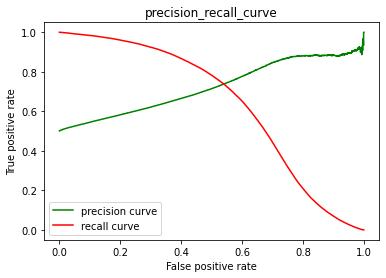

In [105]:
plt.plot(thresholds, p[:-1], "g-", label='precision curve')
plt.plot(thresholds, r[:-1], "r-", label='recall curve')
plt.legend(loc='best')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('precision_recall_curve')
plt.show()

#### From this we can say that our cut - off  is 0.57

In [106]:
# Getting the predicted values on the train set
y_sm_pred = res.predict(sm.tools.tools.add_constant(X_sm))
# making the prediction table
y_train_pred_final = pd.DataFrame({'Actual':y_sm.values, 'probability':y_sm_pred})
y_train_pred_final['CustID'] = y_sm.index
y_train_pred_final.head()

# putting correct cut-off
y_train_pred_final['Predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.57 else 0)
y_train_pred_final.head()

# checking out the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted )
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity and specificity of our logistic regression model
sensititvity=TP / float(TP+FN)
specificity=TN / float(TN+FP)


# Let's check the overall accuracy.
print('Accuracy : ', round(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted),3))
print('Sensititvity : ', round(sensititvity,3))
print('Specificity : ', round(specificity,3))

[[48747 14120]
 [19015 43852]]
Accuracy :  0.736
Sensititvity :  0.698
Specificity :  0.775


####  So using this base model we can predict the churning of customer with 74% accuracy.

#### So the top 10 feature contributing the highest for customers to churn are (Decreasing order of there magnitude) : 

| Feature | Coefficient | Inference | 
| :- | :- | :- |
| std_og_mou_Avg | 1.0053 | If STD outgoing usage increases for a customer then there is high chance of him for churning. |
| total_og_mou_Avg | -0.6808 | If total outgoing usage increases a customer will have lesser chance to churn. |
| total_rech_num_Avg | -0.6356 | If total number of recharge is high customer has less chance to churn. |
| roam_og_mou_Avg | 0.6041 | If there is more outgoing call usage in roaming there is high chance of customer churn. |
| last_day_rch_amt_Avg | -0.5572  |  If last day recharge amount is high there is less chance of customer churning. |
| aon	 | -0.4159 | If area of network increases the chance for customer churn decreases. |
| max_rech_amt_Avg | -0.3797 | If maximum recharge is hihg then there is less chance for customer churn. |
| loc_ic_mou_Avg | -0.1200 | If local incoming call usage increases there is less chance for customer churn.|
| isd_ic_mou_Avg | 0.0980 | If ISD incoming call usage increases there is high chance for customer churn. |
| std_ic_mou_Avg | -0.0630 | If STD incoming call usage increases there is less chance of customer churn. |

#### All these important features can also be confirmed by going back to EDA.

#### Now let's Make model for prediction

#### Dimentionality reduction using PCA 

In [107]:
pca = PCA(random_state=42)

In [108]:
pca.fit(X_sm1)

PCA(random_state=42)

In [109]:
# cumulative variance calculation
var_cumu = np.cumsum(pca.explained_variance_ratio_)

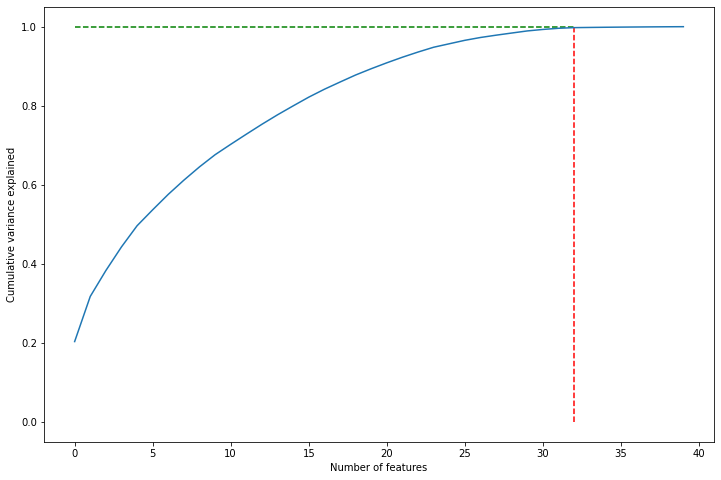

In [110]:
# making scree plot 
fig = plt.figure(figsize=[12,8])
plt.vlines(x=32, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=1.0, xmax=32, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of features")
plt.show()

In [111]:
# applying incremental PCA on train data
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=32)
df_train_pca = pca_final.fit_transform(X_sm1)
df_train_pca.shape

(125734, 32)

In [112]:
# applying PCA on test set
tele_test_pca=pca_final.transform(tele_test)
print(tele_test_pca.shape)

(30000, 32)


#### Choosing which model is better for this problem statement using ROC/AUC curve

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Roc AUC:Logistic Regression classifier 0.8478439995545546
Roc AUC:Random forest classifier 1.0
[20:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Roc AUC:XGboost 0.9544703599561472


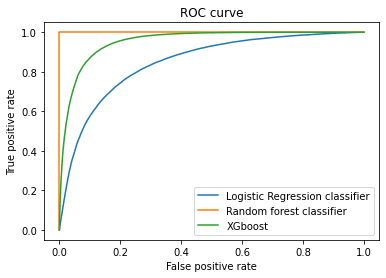

In [113]:
names = ["Logistic Regression classifier","Random forest classifier","XGboost"]
clfs = [
LogisticRegression(random_state=42),
RandomForestClassifier(random_state=42),
xgb.XGBClassifier(random_state=42)
]

plt.figure()
for name,clf in zip(names,clfs):

    clf.fit(df_train_pca,y_sm)
    y_proba = clf.predict_proba(df_train_pca)[:,1]
    print("Roc AUC:"+name, roc_auc_score(y_sm, clf.predict_proba(df_train_pca)[:,1],average='macro'))
    fpr, tpr, thresholds = roc_curve(y_sm, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show() 

#### We can see that AUC score for random forest model is more so we will go ahead with Random forest.

#### Random forest model 

In [114]:
# making random forest model with no hyperparameter
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(df_train_pca, y_sm)
print(cross_val_score(rf, df_train_pca, y_sm,cv=3).mean())

0.8949608552519983


#### Disclaimer : the commented code takes long time to execute, Do not uncomment it. 

#### Let's do course tuning using Randomized Search CV. 

In [115]:
# Randomized search cv
# hyper_params = {
#                 'max_features': range(3,15),
#                 'n_estimators': range(100,200,10),
#                 'max_depth' : range(1,30),
#                 'min_samples_leaf' : range(1,100)
#                 }
# model_rcv = RandomizedSearchCV(estimator=rf, 
#                               param_distributions=hyper_params,
#                               verbose=1,
#                               cv=3,
#                               return_train_score=True,
#                               n_jobs=-1,
#                               n_iter=35)
# model_rcv.fit(df_train_pca, y_sm)

In [116]:
# print(model_cv2.best_score_)
# print(model_cv2.best_estimator_)

#### Let's do fine tuning using Grid Search CV

In [117]:
# Grid Search CV
# hyper_parameters = {
#                     'n_estimators': [200,210,220],
#                     'max_features':[5,6,7],
                    
# }
# rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# model_cv2 = GridSearchCV(estimator=rf,
#                         param_grid=hyper_parameters,
#                         verbose=1,
#                         cv=3,
#                         return_train_score=True,
#                         n_jobs=-1)
# model_cv2.fit(df_train_pca, y_sm)

In [118]:
# printing best estimator and scores
# print(model_cv2.best_score_)
# print(model_cv2.best_estimator_)

#### We concluded that  n_estimators=210, max_features=6 is the best hyperparameter for this problem.

In [119]:
# making random forest model using hyperparameter
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_estimators=210,max_features=6)
rf.fit(df_train_pca, y_sm)

print("Accuracy : ",cross_val_score(rf, df_train_pca, y_sm,cv=3).mean())
print("Precision : ",cross_val_score(rf, df_train_pca, y_sm,cv=3,scoring='precision').mean())
print("Recall : ",cross_val_score(rf, df_train_pca, y_sm,cv=3,scoring='recall').mean())

Accuracy :  0.8963049579726784
Precision :  0.878977580916124
Recall :  0.9191628004498015


#### So our final model scores are :
- Accuracy : 0.90
- Precision :  0.88
- Recall :  0.92

### Step 7 : Making predictions on the test set

In [120]:
# Predicting on test set
pred_probs_test = rf.predict(tele_test_pca)

In [121]:
# making the output data frame
tele_churn_test['churn_probability_final'] = pred_probs_test
output = tele_churn_test[['id','churn_probability_final']]
output.columns=['id','churn_probability']

In [122]:
# checking the shape of the output
output.shape

(30000, 2)

In [123]:
# checking first 5 rows of output data frame
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [126]:
# checking distribution of output
output['churn_probability'].value_counts(normalize=True)

0    0.838967
1    0.161033
Name: churn_probability, dtype: float64

In [127]:
# converting output to csv file
output.to_csv('submission.csv',index=False)

#### Final Inference :

| Feature | Coefficient | Inference | 
| :- | :- | :- |
| std_og_mou_Avg | 1.0053 | If STD outgoing usage increases for a customer then there is high chance of him for churning. |
| total_og_mou_Avg | -0.6808 | If total outgoing usage increases a customer will have lesser chance to churn. |
| total_rech_num_Avg | -0.6356 | If total number of recharge is high customer has less chance to churn. |
| roam_og_mou_Avg | 0.6041 | If there is more outgoing call usage in roaming there is high chance of customer churn. |
| last_day_rch_amt_Avg | -0.5572  |  If last day recharge amount is high there is less chance of customer churning. |
| aon	 | -0.4159 | If area of network increases the chance for customer churn decreases. |
| max_rech_amt_Avg | -0.3797 | If maximum recharge is hihg then there is less chance for customer churn. |
| loc_ic_mou_Avg | -0.1200 | If local incoming call usage increases there is less chance for customer churn.|
| isd_ic_mou_Avg | 0.0980 | If ISD incoming call usage increases there is high chance for customer churn. |
| std_ic_mou_Avg | -0.0630 | If STD incoming call usage increases there is less chance of customer churn. |

##### By : Shreyas Dubey